<a href="https://colab.research.google.com/github/Uday-Bairapaka/Lane-Line-Detection/blob/main/Lane_Line_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lane Line Detection**

The steps of this project are the following:

Compute the camera calibration matrix and

*   distortion coefficients given a set of chessboard images.
*   Apply a distortion correction to raw images.
*   Apply a perspective transform to rectify binary image ("birds-eye view").
*   Use color transforms, gradients, etc., to create a thresholded binary image.

*   Detect lane pixels and fit to find the lane boundary.
*   Determine the curvature of the lane and vehicle position with respect to center.
*   Warp the detected lane boundaries back onto the original image.
*   Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.










In [81]:
# Importing useful files from our github respository

!git clone https://github.com/Uday-Bairapaka/Lane-Line-Detection

fatal: destination path 'Lane-Line-Detection' already exists and is not an empty directory.


In [82]:
!pip install moviepy

!pip3 install imageio==2.4.1

!pip install --upgrade imageio-ffmpeg

  Using cached imageio-2.33.1-py3-none-any.whl (313 kB)
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


  Using cached imageio-2.4.1-py3-none-any.whl
  Attempting uninstall: imageio
    Found existing installation: imageio 2.33.1
    Uninstalling imageio-2.33.1:
      Successfully uninstalled imageio-2.33.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", but you have imageio 2.4.1 which is incompatible.


In [83]:
!pip install PerspectiveTransformation

ERROR: Could not find a version that satisfies the requirement PerspectiveTransformation (from versions: none)
ERROR: No matching distribution found for PerspectiveTransformation


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython.display import HTML, Video
from moviepy.editor import VideoFileClip

In [85]:
import sys
sys.path.insert(0, '/content/Lane-Line-Detection/')


In [86]:
from PerspectiveTransformation import PerspectiveTransformation


In [87]:
from LaneLines import *

# **Adding test images to different lists**

In [88]:
images = []
images.append(mpimg.imread('/content/Lane-Line-Detection/test_images/challenge_video_frame_1.jpg'))
images.append(mpimg.imread('/content/Lane-Line-Detection/test_images/challenge_video_frame_100.jpg'))
images.append(mpimg.imread('/content/Lane-Line-Detection/test_images/challenge_video_frame_110.jpg'))
images.append(mpimg.imread('/content/Lane-Line-Detection/test_images/challenge_video_frame_120.jpg'))
images.append(mpimg.imread('/content/Lane-Line-Detection/test_images/challenge_video_frame_130.jpg'))
images.append(mpimg.imread('/content/Lane-Line-Detection/test_images/challenge_video_frame_140.jpg'))

In [89]:
images1 = []
images1.append(mpimg.imread('/content/Lane-Line-Detection/test_images/project_video_frame_1032.jpg'))
images1.append(mpimg.imread('/content/Lane-Line-Detection/test_images/project_video_frame_1048.jpg'))
images1.append(mpimg.imread('/content/Lane-Line-Detection/test_images/project_video_frame_235.jpg'))
images1.append(mpimg.imread('/content/Lane-Line-Detection/test_images/project_video_frame_810.jpg'))
images1.append(mpimg.imread('/content/Lane-Line-Detection/test_images/project_video_frame_551.jpg'))

In [90]:
images2 = []
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_1.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_10.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_100.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_200.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_300.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_400.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_500.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_600.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_700.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_800.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_900.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_1000.jpg'))
images2.append(mpimg.imread('/content/Lane-Line-Detection/test_images/harder_challenge_video_frame_1100.jpg'))

# **Image transformation (Converting to gray colour)**

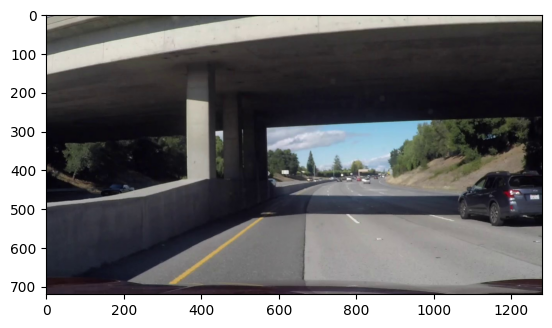

In [91]:
# Code for Perspective Transformation is written seperately in this same file and imported to make code more simple.

img = images[3]
birdeye = PerspectiveTransformation()
plt.imshow(img)

In [92]:
def plot(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    f = plt.figure(figsize=(24, 9))
    ax1 = f.add_subplot(1, 3, 1)
    ax1.imshow(hls[:,:,0], cmap='gray', vmin=0, vmax=255)
    ax2 = f.add_subplot(1, 3, 2)
    ax2.imshow(hls[:,:,1], cmap='gray', vmin=0, vmax=255)
    ax3 = f.add_subplot(1, 3, 3)
    ax3.imshow(hls[:,:,2], cmap='gray', vmin=0, vmax=255)
    plt.figure()
    plt.imshow(img)

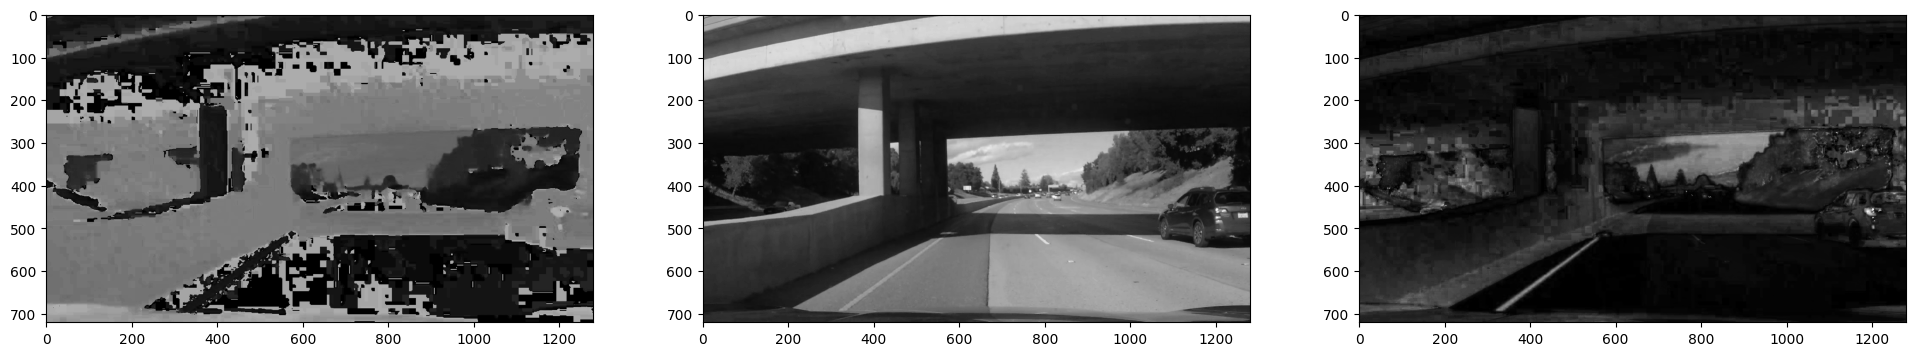

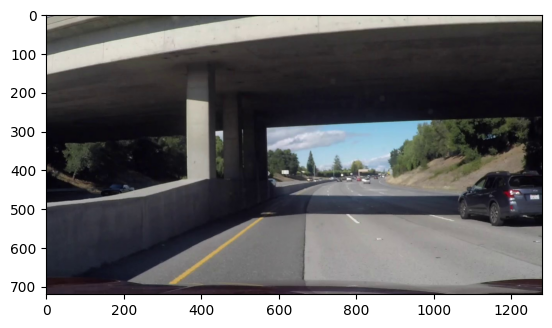

In [93]:
plot(img)

# **Thresholding**

In [94]:
def threshold_rel(img, lo, hi):
    vmin = np.min(img)
    vmax = np.max(img)

    vlo = vmin + (vmax - vmin) * lo
    vhi = vmin + (vmax - vmin) * hi
    return np.uint8((img >= vlo) & (img <= vhi)) * 255

def threshold_abs(img, lo, hi):
    return np.uint8((img >= lo) & (img <= hi)) * 255

In [95]:
def test(img):
    tmp = birdeye.forward(img)
    tmp = np.copy(img)
    hls = cv2.cvtColor(tmp, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(tmp, cv2.COLOR_RGB2HSV)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]

    f = plt.figure(figsize=(24, 16))
    ax1 = f.add_subplot(2, 2, 1)
    ax1.imshow(tmp)
    ax2 = f.add_subplot(2, 2, 2)
    ax2.imshow(threshold_rel(l_channel, 0.8, 1.0), vmin=0, vmax=255, cmap='gray')

    ax3 = f.add_subplot(2, 2, 3)
    ax3.imshow(threshold_rel(s_channel, 0.5, 0.8), vmin=0, vmax=255, cmap='gray')

    ax4 = f.add_subplot(2, 2, 4)
    res = threshold_abs(h_channel, 20, 30)
    res &= threshold_rel(v_channel, 0.7, 1.0)
    ax4.imshow(res, vmin=0, vmax=255, cmap='gray')

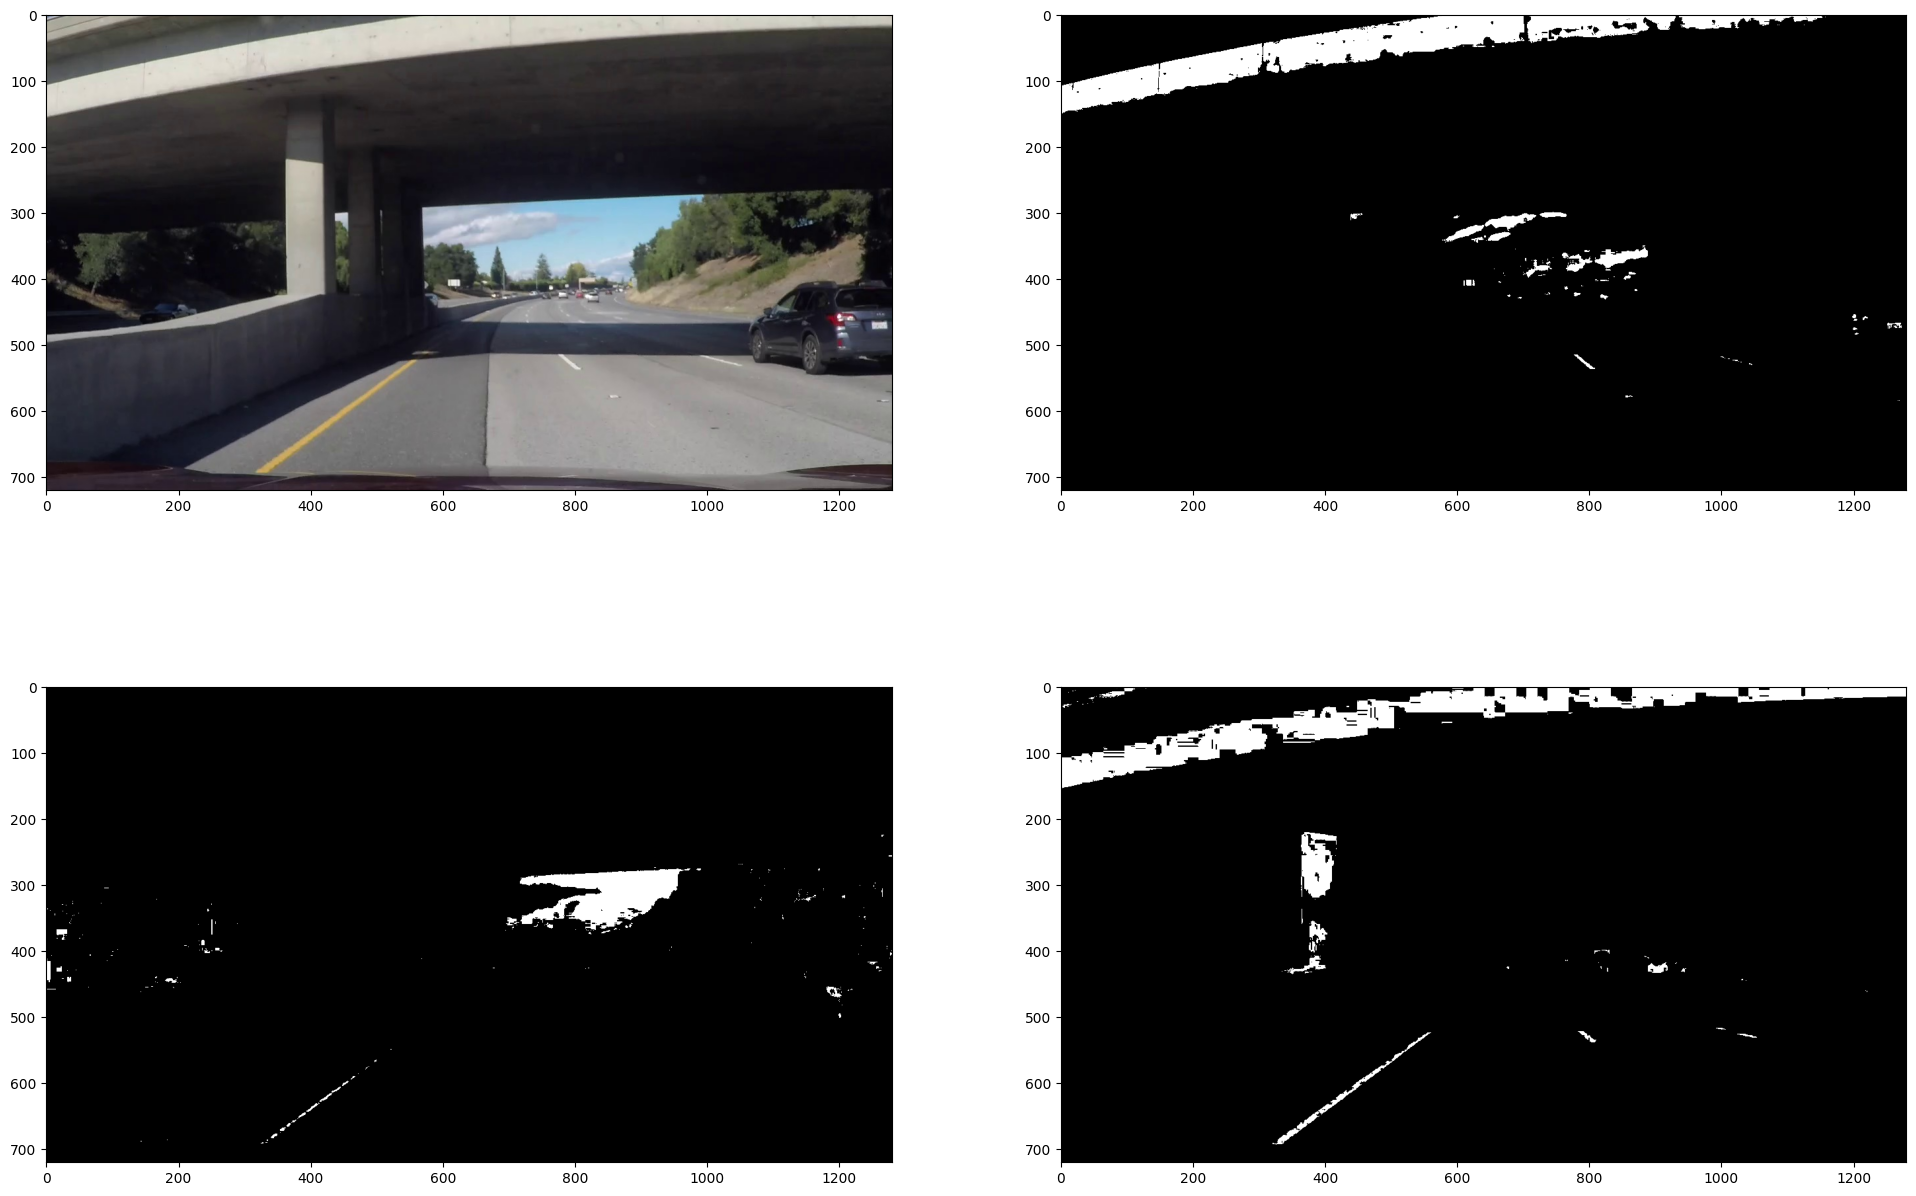

In [96]:
test(images[3])

# **Perspective Transformation**

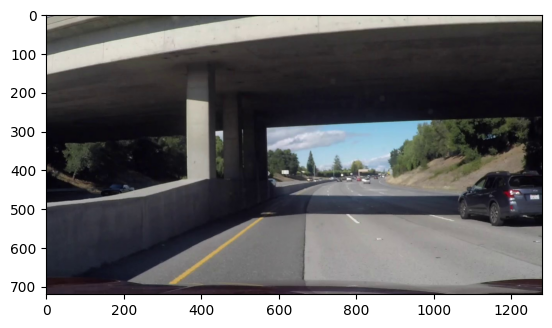

In [97]:
img = images[3]
plt.imshow(img)

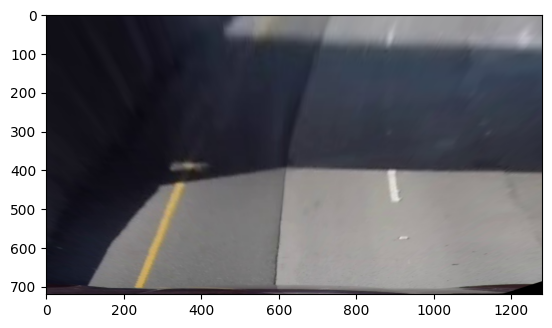

In [98]:
img1 = birdeye.forward(img)
plt.imshow(img1)

#**Applying Both thresholding and perspective transformation**

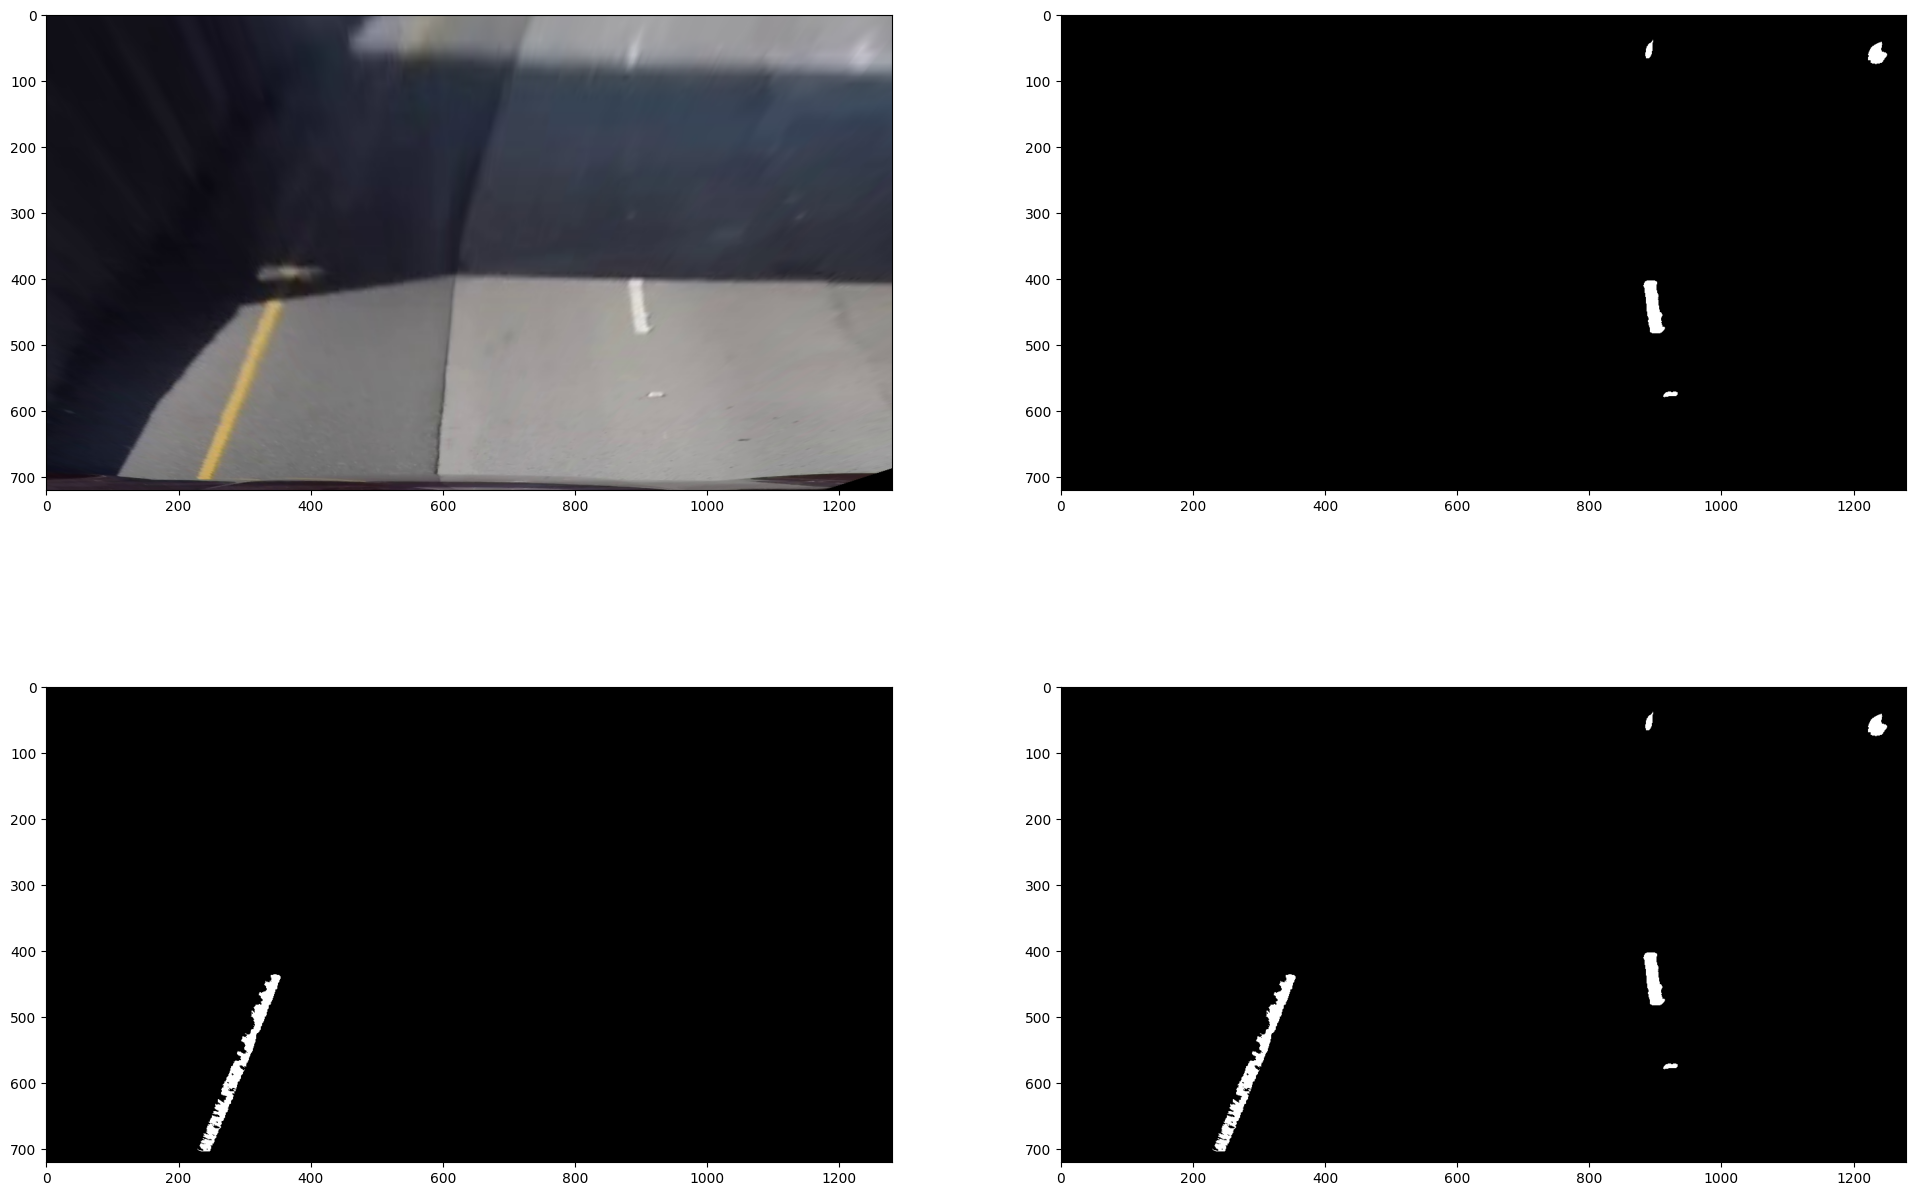

In [99]:
hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
v_channel = hsv[:,:,2]

f = plt.figure(figsize=(24, 16))
ax1 = f.add_subplot(2, 2, 1)
ax1.imshow(img1)
ax2 = f.add_subplot(2, 2, 2)
right_lane = threshold_rel(l_channel, 0.8, 1.0)
# right_lane[:,:750] = 0
ax2.imshow(right_lane, vmin=0, vmax=255, cmap='gray')

ax3 = f.add_subplot(2, 2, 3)
left_lane = threshold_abs(h_channel, 20, 30)
left_lane &= threshold_rel(v_channel, 0.7, 1.0)
left_lane[:,550:] = 0
ax3.imshow(left_lane, vmin=0, vmax=255, cmap='gray')

img2 = left_lane | right_lane
ax4 = f.add_subplot(2, 2, 4)
ax4.imshow(img2, vmin=0, vmax=255, cmap='gray')

# **Applying lane lines on threshold image**

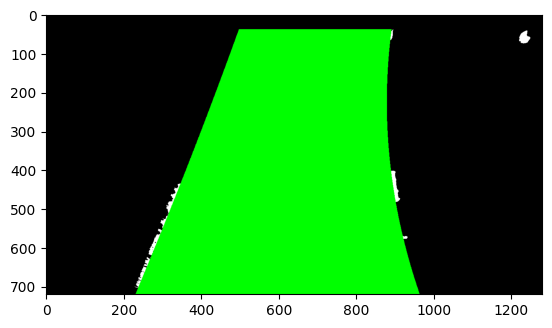

In [100]:
lanelines = LaneLines()
img3 = lanelines.forward(img2)
plt.imshow(img3)


# **Applying back detected lines on original image**

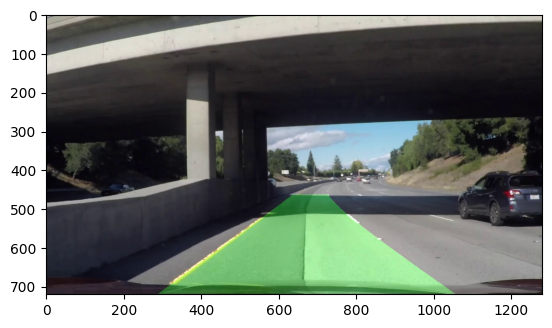

In [102]:
img4 = birdeye.backward(img3)
out_img = cv2.addWeighted(img, 1, img4, 0.3, 0)
plt.imshow(out_img)

# **Image Processing**

In [103]:
birdeye = PerspectiveTransformation()
lanelines = LaneLines()
def process_image(img):
    # step 1
    img1 = birdeye.forward(img)
#     img1 = np.copy(img)

    # step 2
    hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]

    right_lane = threshold_rel(l_channel, 0.8, 1.0)
    right_lane[:,:750] = 0

    left_lane = threshold_abs(h_channel, 20, 30)
    left_lane &= threshold_rel(v_channel, 0.7, 1.0)
    left_lane[:,550:] = 0

    img2 = left_lane | right_lane

#     img2 = birdeye.forward(img2)

    # step 3
    img3 = lanelines.forward(img2)

    # step 4
    img4 = birdeye.backward(img3)
    out_img = cv2.addWeighted(img, 1, img4, 1, 0)

    return out_img

# **Testing Image**

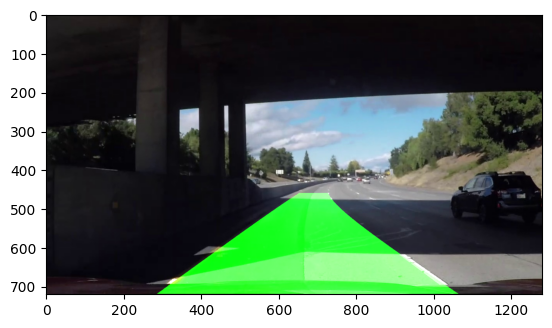

In [104]:
try:
  tmp = process_image(images[4])
except:
  tmp = process_image(images[2])
  tmp = process_image(images[4])
plt.imshow(tmp)

# **Giving input as video**

In [106]:
clip = VideoFileClip("/content/Lane-Line-Detection/project_video.mp4")

# **Output Video**

In [113]:
out_clip = clip.fl_image(process_image)
out_clip.write_videofile("/content/Lane-Line-Detection/output_videos/harder_challenge_video_output.mp4", audio=False)





t:   0%|          | 2/1260 [06:54<01:42, 12.22it/s, now=None]



t:   0%|          | 2/1260 [06:54<01:42, 12.22it/s, now=None]

Moviepy - Building video /content/Lane-Line-Detection/output_videos/harder_challenge_video_output.mp4.
Moviepy - Writing video /content/Lane-Line-Detection/output_videos/harder_challenge_video_output.mp4







t:   0%|          | 2/1260 [09:56<01:42, 12.22it/s, now=None]



t:   0%|          | 2/1260 [09:56<01:42, 12.22it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/Lane-Line-Detection/output_videos/harder_challenge_video_output.mp4


In [114]:
!pip install scikit-learn==0.22.1

  Using cached scikit-learn-0.22.1.tar.gz (6.9 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects
